# Problem set 3 (90 pts)

## Important note: the template for your solution filename is Name_Surname_PS3.ipynb

### The correct answer to the bonus question can be used as an additional reason to increase the final grade in the border case

## Problem 1 (25 pts)

- (5 pts) Prove that $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$ if $\mathrm{vec}(X)$ is a columnwise reshape of a matrix into a long vector. What does it change if the reshape is rowwise? 

**Note:** To make a columnwise reshape in Python one should use ```np.reshape(X, order='f')```, where the string ```'f'``` stands for the Fortran ordering. 

- (2 pts) What is the complexity of a naive computation of $(A \otimes B) x$? Show how it can be reduced.

- (3 pts) Let matrices $A$ and $B$ have eigendecompositions $A = S_A\Lambda_A S_A^{-1}$ and $B = S_B\Lambda_B S^{-1}_B$. Find eigenvectors and eigenvalues of the matrix $A\otimes I + I \otimes B$, where dimension of $I$ coincides with the dimension of $A$ and $B$.


- (10 pts) Let $A = \mathrm{diag}\left(\frac{1}{1000},\frac{2}{1000},\dots \frac{999}{1000}, 1, 1000 \right)$. Estimate analytically the number of iterations required  to solve linear system with $A$ with the relative accuracy $10^{-4}$ using
    - Richardson iteration with the optimal choice of parameter (use $2$-norm)
    - Chebyshev iteration (use $2$-norm)
    - Conjugate gradient method (use $A$-norm).
    
- (5 pts) Provide numerical confirmation of your estimate from theoretical point of view

## Solutions

### 1

Let: $ A \in \mathbb{R}^{n \times p}, X \in \mathbb{R}^{p \times k}, B \in \mathbb{R}^{k \times m}$

$$AX = \begin{bmatrix}
a_{11}x_{11} + a_{12}x_{21} + \cdots + a_{1p}x_{p1} & \cdots & a_{11}x_{1k} + a_{12}x_{2k} + \cdots + a_{1p}x_{pk} \\
\vdots & \ddots & \vdots \\
a_{n1}x_{11} + a_{n2}x_{21} + \cdots + a_{np}x_{p1} & \cdots & a_{n1}x_{1k} + a_{n2}x_{2k} + \cdots + a_{np}x_{pk}\end{bmatrix}$$

$$ \iff $$

$$ AX = \begin{bmatrix}
\sum_{i=1}^{p} a_{1i}x_{i1} & \cdots & \sum_{i=1}^{p} a_{1i}x_{ik} \\
\vdots & \ddots & \vdots \\
\sum_{i=1}^{p} a_{ni}x_{i1} & \cdots & \sum_{i=1}^{p} a_{ni}x_{ik}\end{bmatrix}\in \mathbb{R}^{n \times k};$$

$$AXB = \begin{bmatrix}
\sum_{i=1}^{p} a_{1i}x_{i1} & \cdots & \sum_{i=1}^{p} a_{1i}x_{ik} \\
\vdots & \ddots & \vdots \\
\sum_{i=1}^{p} a_{ni}x_{i1} & \cdots & \sum_{i=1}^{p} a_{ni}x_{ik}\end{bmatrix} B $$

$$ \iff $$

$$ AXB=\begin{bmatrix}
\big( \sum_{i=1}^{p} a_{1i}x_{i1} \big) b_{11} + \big( \sum_{i=1}^{p} a_{1i}x_{i2} \big) b_{21} + \cdots + \big( \sum_{i=1}^{p} a_{1i}x_{ik} \big) b_{k1} & \cdots &
\big( \sum_{i=1}^{p} a_{1i}x_{i1} \big) b_{1m} + \big( \sum_{i=1}^{p} a_{1i}x_{i2} \big) b_{2m} + \cdots + \big( \sum_{i=1}^{p} a_{1i}x_{ik} \big) b_{km} \\
\vdots & \ddots & \vdots \\
\big( \sum_{i=1}^{p} a_{ni}x_{i1} \big) b_{11} + \big( \sum_{i=1}^{p} a_{ni}x_{i2} \big) b_{21} + \cdots + \big( \sum_{i=1}^{p} a_{ni}x_{ik} \big) b_{k1} & \cdots &
\big( \sum_{i=1}^{p} a_{ni}x_{i1} \big) b_{1m} + \big( \sum_{i=1}^{p} a_{ni}x_{i2} \big) b_{2m} + \cdots + \big( \sum_{i=1}^{p} a_{ni}x_{ik} \big) b_{km}\end{bmatrix}$$

$$ \iff $$

$$ AXB = \begin{bmatrix}
\sum_{j=1}^{k} \sum_{i=1}^{p} a_{1i}x_{ij} b_{j1} & \cdots & \sum_{j=1}^{k} \sum_{i=1}^{p} a_{1i}x_{ij} b_{jm} \\
\vdots & \ddots & \vdots \\
\sum_{j=1}^{k} \sum_{i=1}^{p} a_{ni}x_{ij} b_{j1} & \cdots & \sum_{j=1}^{k} \sum_{i=1}^{p} a_{ni}x_{ij} b_{jm}\end{bmatrix}\in \mathbb{R}^{n \times m};$$

$$ \mathrm{vec}(AXB) = \begin{bmatrix}
\sum_{j=1}^{k} \sum_{i=1}^{p} a_{1i}x_{ij} b_{j1} \\
\sum_{j=1}^{k} \sum_{i=1}^{p} a_{2i}x_{ij} b_{j1} \\
\vdots \\
\sum_{j=1}^{k} \sum_{i=1}^{p} a_{ni}x_{ij} b_{j1} \\
\vdots\\
\sum_{j=1}^{k} \sum_{i=1}^{p} a_{1i}x_{ij} b_{jm} \\
\sum_{j=1}^{k} \sum_{i=1}^{p} a_{2i}x_{ij} b_{jm} \\
\vdots \\
\sum_{j=1}^{k} \sum_{i=1}^{p} a_{ni}x_{ij} b_{jm} \\
\end{bmatrix}\in \mathbb{R}^{nm}$$

$$ (B^\top \otimes A) = \begin{bmatrix}
b_{11}A & b_{21}A & \cdots & b_{k1}A \\
b_{12}A & b_{22}A & \cdots & b_{k2}A \\
\vdots & \ddots & \vdots \\
b_{1m}A & b_{2m}A & \cdots & b_{km}A \end{bmatrix}$$

$$ \iff $$

$$ (B^\top \otimes A) = \begin{bmatrix}
b_{11}a_{11} & b_{11}a_{12} & \cdots & b_{11}a_{1p} & \cdots & \cdots & b_{k1}a_{11} & b_{k1}a_{12} & \cdots & b_{k1}a_{1p} \\
b_{11}a_{21} & b_{11}a_{22} & \cdots & b_{11}a_{2p} & \cdots & \cdots & b_{k1}a_{21} & b_{k1}a_{22} & \cdots & b_{k1}a_{2p} \\
\vdots & \vdots & \ddots & \vdots &   &   & \vdots & \vdots & \ddots & \vdots \\
b_{11}a_{n1} & b_{11}a_{n2} & \cdots & b_{11}a_{np} & \cdots & \cdots & b_{k1}a_{n1} & b_{k1}a_{n2} & \cdots & b_{k1}a_{np} \\
\vdots & \vdots &   & \vdots & \ddots &   & \vdots & \vdots &   & \vdots \\
\vdots & \vdots &   & \vdots &   & \ddots & \vdots & \vdots &   & \vdots \\
b_{1m}a_{11} & b_{1m}a_{12} & \cdots & b_{1m}a_{1p} & \cdots & \cdots & b_{km}a_{11} & b_{km}a_{12} & \cdots & b_{km}a_{1p} \\
b_{1m}a_{21} & b_{1m}a_{22} & \cdots & b_{1m}a_{2p} & \cdots & \cdots & b_{km}a_{21} & b_{km}a_{22} & \cdots & b_{km}a_{2p} \\
\vdots & \vdots & \ddots & \vdots &   &   & \vdots & \vdots & \ddots & \vdots \\
b_{1m}a_{n1} & b_{1m}a_{n2} & \cdots & b_{1m}a_{np} & \cdots & \cdots & b_{km}a_{n1} & b_{km}a_{n2} & \cdots & b_{km}a_{np}\end{bmatrix}\in \mathbb{R}^{mn \times pk};$$

Because $\mathrm{vec}(X) \in \mathbb{R}^{pk}$, then:

$$ (B^\top \otimes A)\mathrm{vec}(X)= \begin{bmatrix}
b_{11}a_{11} & b_{11}a_{12} & \cdots & b_{11}a_{1p} & \cdots & \cdots & b_{k1}a_{11} & b_{k1}a_{12} & \cdots & b_{k1}a_{1p} \\
b_{11}a_{21} & b_{11}a_{22} & \cdots & b_{11}a_{2p} & \cdots & \cdots & b_{k1}a_{21} & b_{k1}a_{22} & \cdots & b_{k1}a_{2p} \\
\vdots & \vdots & \ddots & \vdots &   &   & \vdots & \vdots & \ddots & \vdots \\
b_{11}a_{n1} & b_{11}a_{n2} & \cdots & b_{11}a_{np} & \cdots & \cdots & b_{k1}a_{n1} & b_{k1}a_{n2} & \cdots & b_{k1}a_{np} \\
\vdots & \vdots &   & \vdots & \ddots &   & \vdots & \vdots &   & \vdots \\
\vdots & \vdots &   & \vdots &   & \ddots & \vdots & \vdots &   & \vdots \\
b_{1m}a_{11} & b_{1m}a_{12} & \cdots & b_{1m}a_{1p} & \cdots & \cdots & b_{km}a_{11} & b_{km}a_{12} & \cdots & b_{km}a_{1p} \\
b_{1m}a_{21} & b_{1m}a_{22} & \cdots & b_{1m}a_{2p} & \cdots & \cdots & b_{km}a_{21} & b_{km}a_{22} & \cdots & b_{km}a_{2p} \\
\vdots & \vdots & \ddots & \vdots &   &   & \vdots & \vdots & \ddots & \vdots \\
b_{1m}a_{n1} & b_{1m}a_{n2} & \cdots & b_{1m}a_{np} & \cdots & \cdots & b_{km}a_{n1} & b_{km}a_{n2} & \cdots & b_{km}a_{np}\end{bmatrix} \begin{bmatrix}
x_{11} \\
x_{21} \\
\vdots \\
x_{p1} \\
x_{12} \\
x_{22} \\
\vdots \\
x_{p2} \\
\vdots \\
x_{pk}\end{bmatrix}$$

$$ \iff $$

$$ (B^\top \otimes A)\, \mathrm{vec}(X)= \begin{bmatrix}
\sum_{j=1}^{k} \sum_{i=1}^{p} a_{1i}x_{ij} b_{j1} \\
\sum_{j=1}^{k} \sum_{i=1}^{p} a_{2i}x_{ij} b_{j1} \\
\vdots \\
\sum_{j=1}^{k} \sum_{i=1}^{p} a_{ni}x_{ij} b_{j1} \\
\sum_{j=1}^{k} \sum_{i=1}^{p} a_{1i}x_{ij} b_{jm} \\
\sum_{j=1}^{k} \sum_{i=1}^{p} a_{2i}x_{ij} b_{jm} \\
\vdots \\
\sum_{j=1}^{k} \sum_{i=1}^{p} a_{ni}x_{ij} b_{jm}\end{bmatrix}$$

<br>
<br>

So: $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$

#### If reshape is row-wise


$$ \mathrm{vec}(AXB) = \begin{bmatrix}
\sum_{j=1}^{k} \sum_{i=1}^{p} a_{1i}x_{ij} b_{j1} \\
\sum_{j=1}^{k} \sum_{i=1}^{p} a_{1i}x_{ij} b_{j2} \\
\vdots \\
\sum_{j=1}^{k} \sum_{i=1}^{p} a_{1i}x_{ij} b_{jm} \\
\vdots\\
\sum_{j=1}^{k} \sum_{i=1}^{p} a_{ni}x_{ij} b_{j1} \\
\sum_{j=1}^{k} \sum_{i=1}^{p} a_{ni}x_{ij} b_{j2} \\
\vdots \\
\sum_{j=1}^{k} \sum_{i=1}^{p} a_{ni}x_{ij} b_{jm} \\
\end{bmatrix}\in \mathbb{R}^{nm}$$


$$ (B^\top \otimes A)\mathrm{vec}(X)=\begin{bmatrix}
b_{11}a_{11} & b_{11}a_{12} & \cdots & b_{11}a_{1p} & \cdots & \cdots & b_{k1}a_{11} & b_{k1}a_{12} & \cdots & b_{k1}a_{1p} \\
b_{11}a_{21} & b_{11}a_{22} & \cdots & b_{11}a_{2p} & \cdots & \cdots & b_{k1}a_{21} & b_{k1}a_{22} & \cdots & b_{k1}a_{2p} \\
\vdots & \vdots & \ddots & \vdots &   &   & \vdots & \vdots & \ddots & \vdots \\
b_{11}a_{n1} & b_{11}a_{n2} & \cdots & b_{11}a_{np} & \cdots & \cdots & b_{k1}a_{n1} & b_{k1}a_{n2} & \cdots & b_{k1}a_{np} \\
\vdots & \vdots &   & \vdots & \ddots &   & \vdots & \vdots &   & \vdots \\
\vdots & \vdots &   & \vdots &   & \ddots & \vdots & \vdots &   & \vdots \\
b_{1m}a_{11} & b_{1m}a_{12} & \cdots & b_{1m}a_{1p} & \cdots & \cdots & b_{km}a_{11} & b_{km}a_{12} & \cdots & b_{km}a_{1p} \\
b_{1m}a_{21} & b_{1m}a_{22} & \cdots & b_{1m}a_{2p} & \cdots & \cdots & b_{km}a_{21} & b_{km}a_{22} & \cdots & b_{km}a_{2p} \\
\vdots & \vdots & \ddots & \vdots &   &   & \vdots & \vdots & \ddots & \vdots \\
b_{1m}a_{n1} & b_{1m}a_{n2} & \cdots & b_{1m}a_{np} & \cdots & \cdots & b_{km}a_{n1} & b_{km}a_{n2} & \cdots & b_{km}a_{np}\end{bmatrix} \begin{bmatrix}
x_{11} \\
x_{12} \\
\vdots \\
x_{1k} \\
x_{21} \\
x_{22} \\
\vdots \\
x_{2k} \\
\vdots \\
x_{pk}\end{bmatrix}$$

$(B^\top \otimes A)$ is made of scaled $A$. Now we can't create such sums. If reshape is **column-wise** elements in $\mathrm{vec}(X)$, which could be represented as blocks, match in amount with number of columns $\times$ number of rows in $(B^\top \otimes A)$. If reshape is **row-wise**, it does not.

**Reshape is row-wise:**

$$ \mathrm{vec}(X) = \begin{bmatrix}
x_1 \\
x_2 \\
\vdots \\
x_p\end{bmatrix}, $$

where $x_i \in \mathbb{R}^{k}$

**Reshape is column-wise:**

$$ \mathrm{vec}(X) = \begin{bmatrix}
x_1 \\
x_2 \\
\vdots \\
x_k\end{bmatrix}, $$

where $x_i \in \mathbb{R}^{p}$

### 2

Complexity of $(A \otimes B) x$

Let: $ A \in \mathbb{R}^{n \times p}, B \in \mathbb{R}^{k \times m}, x \in \mathbb{R}^{pm}$.

$A \otimes B \in \mathbb{R}^{nk \times pm}$, so, there are $nkpm$ scalar by scalar multiplications. Matrix with shape $nk \times pm$ and vector with shape $pm$ are multiplited by $nkpm$ mupliplications and $nk(pm-1)$ additions. So, there are $ 3nkpm - nk $ operations. So, complexity is $\mathcal{O}(nkpm)$.

With this property from [here](https://en.wikipedia.org/wiki/Kronecker_product):

$$ (A \otimes B) x = \mathrm{vec}(BXA^T), $$

where $X = \mathrm{vec^{-1}}(x)$ is the inverse of the vectorization operator.

This $\mathrm{vec}(BXA^T)$ Has complexity of a matrix product up to a scalar.

 - Matrix-by-matrix multiplication of $BX$, where $B \in \mathbb{R}^{k \times m}, X \in \mathbb{R}^{m \times p}$ has $pkm$ multiplication and $pk(m-1)$ additions. Operations in total for $BX$: $2pkm - pk$.
 
 - Matrix-by-matrix multiplication of $(BX)A^T$, where $BX \in \mathbb{R}^{k \times p}, A^T \in \mathbb{R}^{p \times n}$ has $nkp$ multiplication and $nk(p-1)$ additions. Operations in total for $(BX)A^T$: $2nkp - nk$.
 
Hence, total complexity is $\mathcal{O}(pkm + nkp)$.

### 3

Let matrices $A$ and $B$ have eigendecompositions $A = S_A\Lambda_A S_A^{-1}$ and $B = S_B\Lambda_B S^{-1}_B$. Find eigenvectors and eigenvalues of the matrix $A\otimes I + I \otimes B$, where dimension of $I$ coincides with the dimension of $A$ and $B$.

#### Eigenvalues

$A \in \mathbb{R}^{n \times n}$ and $B \in \mathbb{R}^{m \times m}$ are square because of the existence of eigendecomposition. Schur form of $A$ and $B$:

$$ A = Q_A U_A Q_A^*, $$

$$ B = Q_B U_B Q_B^*, $$

where $Q_A$ and $Q_B$ are unitary, and $U_A$ and $U_B$ are upper triangular.

Some properties of a Kronecker product:

$(A \otimes B)(C \otimes D) = AC \otimes BD$

$(A \otimes B)^* = A^* \otimes B^*$

$(cA) \otimes B = A \otimes (cB) = c (A \otimes B)$, where $c$ is ascalar.

Then:

$$ (Q_A \otimes Q_B)^*(A \otimes I)(Q_A \otimes Q_B) = (Q_A^* A Q_A) \otimes (Q_B^* I Q_B) = U_A \otimes I$$

At the same time:

$$ (Q_A \otimes Q_B)^*(I \otimes B)(Q_A \otimes Q_B) = (Q_A^* I Q_A) \otimes (Q_B^* B Q_B) = I \otimes U_B $$

So:

$$ (Q_A \otimes Q_B)^*(A \otimes I + I \otimes B)(Q_A \otimes Q_B) = U_A \otimes I + I \otimes U_B$$

Where:

$$ U_A \otimes I = \begin{bmatrix}
\lambda_{A1} I & *        & *         & *     & * \\
           & \lambda_{A2} I & *         & *     & * \\
           &            & \lambda_{A3} I & *     & * \\
           &            &            & \ddots & \vdots \\
           &            &            &        & \lambda_{An} I\end{bmatrix},$$

where $*$ is some value, which we are not interested in.

$$ I \otimes U_B = \begin{bmatrix}
U_B &          &           &       &  0 \\
           & U_B &           &       &     \\
           &            & U_B &       &   \\
           &            &            & \ddots &  \\
0 &            &            &        & U_B\end{bmatrix}$$

It's pretty clear, that eigenvalues of $U_A \otimes I + I \otimes U_B$ are the sum of eigenvectors of $A$ and $B$.

#### Eigenvectors

Let $z = x \otimes y$ is an eigenvector of $(A \otimes I + I \otimes B)$, where $Ax = \lambda_A x$ and $Bx = \lambda_B x$. Then:

$$ (A \otimes I + I \otimes B) z = (\lambda_A + \lambda_B) z \iff (A \otimes I) z + (I \otimes B) z = (\lambda_A + \lambda_B) z \iff (A \otimes I) (x \otimes y) + (I \otimes B) (x \otimes y) = (\lambda_A + \lambda_B) (x \otimes y) \iff$$

$$\iff (Ax \otimes Iy) + (Ix \otimes By) = (\lambda_A + \lambda_B) (x \otimes y) \iff (\lambda_Ax \otimes y) + (x \otimes \lambda_By) = (\lambda_A + \lambda_B) (x \otimes y) \iff$$

$$\iff \lambda_A(x \otimes y) + \lambda_B (x \otimes y) = (\lambda_A + \lambda_B) (x \otimes y) \iff True$$

### 4

#### Richardson iteration with the optimal choice of parameter

Optimal parameter is:

$$ \tau_{opt} = \frac{2}{\lambda_{min} + \lambda_{max}} $$

As well $A = \mathrm{diag}\left(\frac{1}{1000},\frac{2}{1000},\dots \frac{999}{1000}, 1, 1000 \right)$, then $\lambda_{min} = \frac{1}{1000}$ and $\lambda_{max}=1000$.

The error on the next step with optimal parameter:

$$ \| e_k \|_2 \leq q^k \| e_0 \|_2, $$

where $q = \frac{\lambda_{max} - \lambda_{min}}{\lambda_{min} + \lambda_{max}}$.

Relative accuracy $10^{-4}$: $\frac{\| e_k \|_2}{\| e_0 \|_2} = 10^{-4},$ so:

$$ \bigg( \frac{\lambda_{max} - \lambda_{min}}{\lambda_{min} + \lambda_{max}} \bigg) ^ k = 10^{-4} \iff$$

$$ \iff \bigg( \frac{1000 - \frac{1}{1000}}{\frac{1}{1000} + 1000} \bigg) ^ k = 10^{-4}  \iff$$

$$ \iff \bigg( \frac{999999}{1000001} \bigg) ^ k = 10^{-4} \iff$$

$$ \iff k \log_{10}\frac{999999}{1000001} = -4 \log_{10}10 \iff$$

$$ \iff k = \frac{-4}{\log_{10}\frac{999999}{1000001}}$$

In [2]:
import numpy as np
-4 / np.log10(999999 / 1000001)

4605170.186012501

In [3]:
print('Number of iterations for Richardson iteartion: 4605171.')

Number of iterations for Richardson iteartion: 4605171.


#### Chebyshev iteration

$$ \| e_k \| \leq C q^k \| e_0 \|, $$

$$ q = \frac{\sqrt{\mathrm{cond}(A)} - 1}{\sqrt{\mathrm{cond}(A)} + 1} $$

Where condition number:

$$ \mathrm{cond}_2(A) = \| A \|_2 \| A^{-1} \|_2 = \frac{\sigma_{max}}{\sigma_{min}}; $$

$$ \mathrm{cond}_2(A) = \frac{1000}{\frac{1}{1000}} = 10^6$$

So:

$$ \frac{\| e_k \|_2}{\| e_0 \|_2} = 10^{-4}; $$

$$ 10^{-4} = C q^k \iff \frac{10^{-4}}{C} = \bigg( \frac{\sqrt{10^6} - 1}{\sqrt{10^6} + 1} \bigg)^k \iff$$

$$ \iff \frac{10^{-4}}{C} = \bigg( \frac{999}{1001} \bigg)^k \iff \log_{10} \bigg( \frac{10^{-4}}{C} \bigg) = k \log_{10}\frac{999}{1001} \iff$$

$$ \iff -4 - log_{10}C = k \log_{10}\frac{999}{1001} \iff k = \frac{-4 - log_{10}C}{\log_{10}\frac{999}{1001}}$$

Let's calucate the exact number of iteration for $C = 1$:

$$k = \frac{-4}{\log_{10}\frac{999}{1001}}$$

In [4]:
-4 / np.log10(999 / 1001)

4605.168650930854

In [14]:
print('Number of iterations for Chebyshev iteartion with C = 1: 4606.')

Number of iterations for Chebyshev iteartion with C = 1: 4606.


#### Conjugate gradient method

One of the upper bound is the same as for Chebyshev iteration method: 

$$ \frac{\| x_k - x_* \|_A}{\| x_* \|} \leq \gamma \bigg( \frac{\sqrt{\mathrm{cond}(A)} - 1}{\sqrt{\mathrm{cond}(A)} + 1} \bigg) ^ k$$

But at the same time: ```if eigenvalues are clustered and there are``` $l$ ```outliers, then after first``` $\mathcal{O}(l)$ ```iterations CG will converge as if there are no outliers (and hence the effective condition number is smaller).``` So: $ \mathrm{cond}(A)= 1000$.

$$ 10^{-4} = \gamma q^k \iff \frac{10^{-4}}{\gamma} = \bigg( \frac{\sqrt{10^3} - 1}{\sqrt{10^3} + 1} \bigg)^k \iff$$

$$ \iff k = \frac{-4 - \log_{10}{\gamma}}{\log_{10}\frac{10\sqrt{10} - 1}{10\sqrt{10} + 1}}$$

From [here](https://www.jstor.org/stable/43693008?seq=4#metadata_info_tab_contents) I get, that $\gamma = 2$. Lets calcualte for this $\gamma$:

$$k = \frac{-4 - \log_{10}2}{\log_{10}\frac{10\sqrt{10} - 1}{10\sqrt{10} + 1}}$$

In [10]:
(-4 - np.log10(2)) / np.log10((10 * np.sqrt(10) - 1) / (10 * np.sqrt(10) + 1))

156.53567733707564

In [12]:
print('Number of iterations for Conjuate gradient method with gamma = 10: 157.')

Number of iterations for Conjuate gradient method with gamma = 10: 157.


### 5. Numerical confiramtion of theoretical derivation

#### Richardson iteration

In [4]:
# Create matrix A and set tolerance
import numpy as np

diag_list = []
for i in range(1, 1001):
    diag_list.append(i / 1000)
diag_list.append(1000)

A = np.diag(diag_list)
tol = 1e-4

tau = 2 / (1e3 + 1e-3)
x = np.zeros(A.shape[0])
f = np.random.rand(A.shape[0])
x_true = 1 / np.array(diag_list) * f

In [5]:
# Richardson iteration
rel_error = [np.linalg.norm(x - x_true, 2) / np.linalg.norm(x_true, 2)]
k = 1

while rel_error[-1] > tol:
    x = x - tau * (A @ x - f)
    rel_error.append(np.linalg.norm(x - x_true, 2) / np.linalg.norm(x_true, 2))
    if k % 100000 == 0:
        print('k\n', k, end='\n\n')
        print('Error\n', rel_error[-1], end='\n\n')
    k += 1

k
 100000

Error
 0.7786419018042294

k
 200000

Error
 0.6331766718989651

k
 300000

Error
 0.517303005042021

k
 400000

Error
 0.4231415217485388

k
 500000

Error
 0.34626707495738945

k
 600000

Error
 0.2834146604236014

k
 700000

Error
 0.2319961149994008

k
 800000

Error
 0.18991876532170476

k
 900000

Error
 0.1554795871833852

k
 1000000

Error
 0.12728898812323247

k
 1100000

Error
 0.10421162665599608

k
 1200000

Error
 0.08531919520480014

k
 1300000

Error
 0.0698523164478002

k
 1400000

Error
 0.057189619073793545

k
 1500000

Error
 0.04682255965714435

k
 1600000

Error
 0.03833488292911408

k
 1700000

Error
 0.0313858452071472

k
 1800000

Error
 0.025696500521435222

k
 1900000

Error
 0.021038484407731515

k
 2000000

Error
 0.01722483727300811

k
 2100000

Error
 0.014102494712745738

k
 2200000

Error
 0.01154614102409297

k
 2300000

Error
 0.009453177941172258

k
 2400000

Error
 0.007739605961070121

k
 2500000

Error
 0.006336652575336748

k
 2600000



Number of iteration k = 4574469
Realtive error: 9.999994670653496e-05


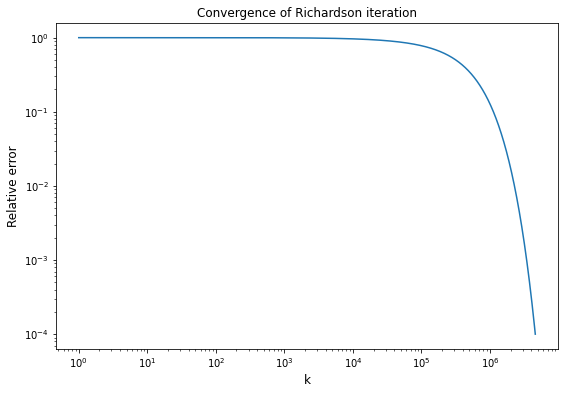

In [6]:
import matplotlib.pyplot as plt 

plt.rcParams['figure.figsize'] = (9, 6)
plt. plot(list(range(1, k + 1)), rel_error)
#plt.semilogy(rel_error)
plt.xlabel('k', fontsize=12)
plt.ylabel('Relative error', fontsize=12)
plt.title('Convergence of Richardson iteration');
plt.yscale('log')
plt.xscale('log');
print('Number of iteration k =', k)
print('Realtive error:', rel_error[-1])

#### Chebyshev iteration

In [7]:
# Chebyshev iteration
niters = 2 ** 15
roots = [np.cos((np.pi * (2 * i + 1)) / (2 * niters)) for i in range(niters)]
taus = [(1e3 + 1e-3 - (1e-3 - 1e3) * r) / 2 for r in roots]
rel_error_ch = []

x = np.zeros(A.shape[0])

# Lebedev permutation (took it from the lecture)
# There number of iteration should be a power of 2
def leb_shuffle_2n(n):
    if n == 1:
        return np.array([0,], dtype=int)
    else:
        prev = leb_shuffle_2n(n // 2)
        ans = np.zeros(n, dtype=int)
        ans[::2] = prev
        ans[1::2] = n - 1 - prev
        return ans

good_perm_even = leb_shuffle_2n(niters)

r = A @ x - f
for k in range(niters):
    x = x - 1.0 / taus[good_perm_even[k]] * r
    r = A @ x - f
    rel_error_ch.append(np.linalg.norm(x - x_true, 2) / np.linalg.norm(x_true, 2))
    if rel_error_ch[-1] <= tol:
        break

Number of iteration k = 5058
Realtive error: 9.676818136301523e-05


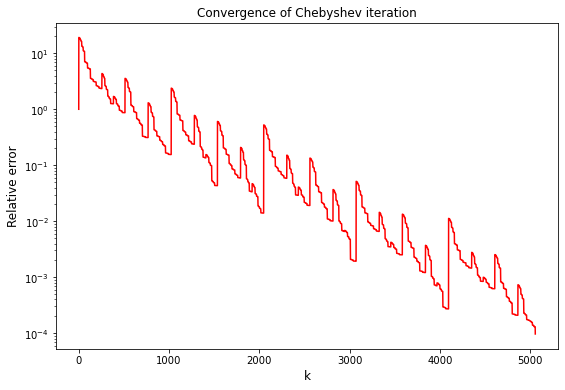

In [8]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (9, 6)
#plt.plot(list(range(1, k + 2)), rel_error_ch)
plt.semilogy(rel_error_ch, 'r')
plt.xlabel('k', fontsize=12)
plt.ylabel('Relative error', fontsize=12)
plt.title('Convergence of Chebyshev iteration');
#plt.yscale('log')
#plt.xscale('log');
print('Number of iteration k =', k + 1)
print('Realtive error:', rel_error_ch[-1])

#### Conjugate gradient method

In [9]:
# Conjugate gradient method
num_iter = 200
rel_error_cg = []

def a_norm(A, x):
    return np.sqrt(np.inner(A @ x, x))
    
x = np.zeros(A.shape[0])
r = f 
p = r

for k in range(1, num_iter + 1):
    v = A @ p
    
    r_prev = r
    a = np.inner(r_prev, r_prev) / np.inner(v, p)
    r = r - a * v
    x = x + a * p
    b = np.inner(r, r) / np.inner(r_prev, r_prev)
    p = r + b * p
    
    rel_error_cg.append(a_norm(A, (x - x_true)) / a_norm(A, (x_true)))
    if rel_error_cg[-1] <= tol:
        break

Number of iteration k = 140
Realtive error: 9.799735466991376e-05


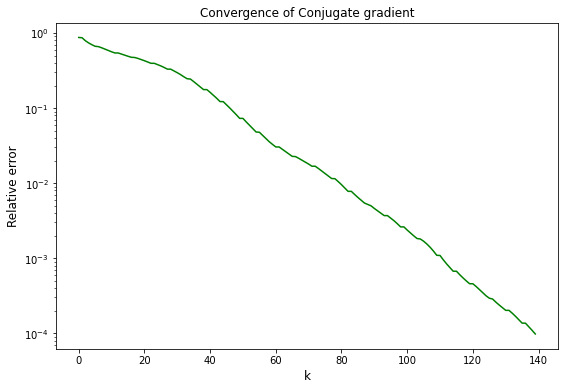

In [11]:
plt.rcParams['figure.figsize'] = (9, 6)
#plt.plot(list(range(1, k + 2)), rel_error_ch)
plt.semilogy(rel_error_cg, 'g')
plt.xlabel('k', fontsize=12)
plt.ylabel('Relative error', fontsize=12)
plt.title('Convergence of Conjugate gradient');
#plt.yscale('log')
#plt.xscale('log');
print('Number of iteration k =', k)
print('Realtive error:', rel_error_cg[-1])

## Problem 2 (65 pts)
### On the performance of conjugate gradient method for BTTB matrices.

You are given 2D image (QR-code) and convolution operator $T$. The application of $T$ results in smoothing of the image. In exact arithmetic, the proposed $T$ is non-singular. However, it becomes rather ill-conditioned with increasing $N$ in finite precision arithmetic. In this task you need to study how the conjugate gradient method performs in this case.

The original passcode is given below:

(-0.5, 329.5, 329.5, -0.5)

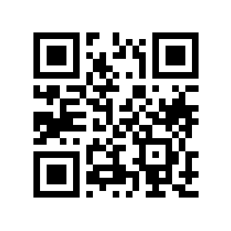

In [15]:
import matplotlib.pyplot as plt
import numpy as np
x_qr = plt.imread('qrcode.gif')[:,:,0]
n = x_qr.shape[0]
plt.imshow(x_qr, cmap="gray")
plt.axis("off")

Blurring can be performed by convolving $n\times n$ QR-code with the following filter:

$$T_{i_1j_1,i_2j_2} = T_{i_1-j_1,i_2-j_2} = \frac{\alpha}{\pi}e^{-\alpha[(i_1-j_1)^2 + (i_2-j_2)^2]}, \quad i_1,j_1,i_2,j_2 = 1 \ldots n, \quad 1 > \alpha > 0.$$

You know from lectures that this convolution can be viewed as a matrix-vector multiplication of some BTTB matrix $T$ of size $n^2 \times n^2$.

## Task 1 (15 pts) 

- Write function `T_matvec()` that performs multiplication of $T$ by a given vector $x$ efficiently. Remember about FFT.
- Use `scipy.sparse.linalg.LinearOperator` to create an object that has attribute `.dot()` (this object will be further used in the iterative process). Note that `.dot()` input and output must be 1D vectors, so do not forget to use reshape.

In [16]:
from scipy.sparse.linalg import LinearOperator

def mat_from_vec(x):
    n = int(np.sqrt(x.shape[0]))
    x = np.split(x, n)
    
    for i, arr in enumerate(x):
        x[i] = np.append(arr, [0] * (n - 1))
    x = np.array(x)
    for i in range(n - 1):
        x = np.append(x, np.array([[0] * (2 * n - 1)]), axis=0)

    return x


def mat_of_bttb(n, alpha):
    A = np.zeros((2 * n - 1, 2 * n - 1))
    ij = list(range(0, n))
    ij.extend(list(range(-n + 1, 0)))

    for i, ij_1 in enumerate(ij):
        for j, ij_2 in enumerate(ij):
            A[i, j] = alpha / np.pi * np.exp(-alpha * (ij_1 ** 2 + ij_2 ** 2))    

    return A


def T_matvec(x, alpha):
    n = int(np.sqrt(x.shape[0]))
    x = mat_from_vec(x)
    A = mat_of_bttb(n, alpha)
    
    mat_vec = np.fft.ifft2(np.fft.fft2(A) * np.fft.fft2(x)) 
    return np.reshape(mat_vec.T[:n, :n], newshape=n ** 2, order='f')

T_1 = LinearOperator((n**2, n**2), matvec = lambda x : T_matvec(x, alpha=0.1))
T_2 = LinearOperator((n**2, n**2), matvec = lambda x : T_matvec(x, alpha=0.01))
T_3 = LinearOperator((n**2, n**2), matvec = lambda x : T_matvec(x, alpha=0.001))

**Remark.** The obtained matrix $T$ is positive definite (at least in the exact arithmetic), hence the conjugate gradient method can be applied to solve with $T$.

**Bonus question: Prove the remark above.**

First of all: a matrix is positive definite if it’s symmetric and all its eigenvalues are positive [source](chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/viewer.html?pdfurl=https%3A%2F%2Fwww.math.utah.edu%2F~zwick%2FClasses%2FFall2012_2270%2FLectures%2FLecture33_with_Examples.pdf&clen=73970&chunk=true).

Out BTTB is symmetric because of squared indexes. What about positive eigenvalues?

Also there is a Lemma 4.1. [from here](chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/viewer.html?pdfurl=https%3A%2F%2Fee.stanford.edu%2F~gray%2Ftoeplitz.pdf&clen=466426&chunk=true):

Let $\tau_{n,k}$ be the eigenvalues of a Toeplitz matrix $T_n(f)$. If $T_n(f)$ Hermitian:

$$ m_f \leq \tau_{n,k} \leq M_f, $$

where $m_f$ and $M_f$ are the greatest lower bound and the least upper bound of $f(\lambda)$ rexpectively.

Let $\{t_k; k=0, \pm 1,\dots, \pm n\}$ is a sequence which define the finite $(n \times n)$ Toeplitz matrix $T_n = \{t_{k-j}\}$.

If $t_k$ are absolutely summable, i.e:

$$\sum_{k=-\infty}^{\infty} |t_k| < \infty$$

Then the Fourier series $f(\lambda)$ exists:

$$ f(\lambda) = \sum_{k=-\infty}^{\infty} t_k e^{ik\lambda}, $$

Lets consider the first block matrix of initail BTTB, then:

$$ t_0 = \frac{\alpha}{\pi} e^{-\alpha \cdot 0^2}, t_{k-j} = t_0$$

$$ t_1 = \frac{\alpha}{\pi} e^{-\alpha \cdot 1^2}, t_{k-j} = t_1$$

$$ t_2 = \frac{\alpha}{\pi} e^{-\alpha \cdot 2^2}, t_{k-j} = t_2 $$

$$ \vdots$$

$$ t_{n-1} = \frac{\alpha}{\pi} e^{-\alpha \cdot (n-1)^2}, t_{k-j} = t_{n-1}$$

Hence, the sequence:

$$ \{t_k = \frac{\alpha}{\pi} e^{-\alpha \cdot (k)^2}; k=0, \pm 1,\dots, \pm n\}$$

It's clear, that this sequence is bounded from above and we have: $ \sum_{k=-\infty}^{\infty} |t_k| < \infty$

So, we can say that Fourier series exists and equals:

$$ f(\lambda) = \sum_{k=-\infty}^{\infty} \frac{\alpha}{\pi} e^{-\alpha \cdot (k)^2} e^{ik\lambda} \iff f(\lambda) = \sum_{k=-\infty}^{\infty} \frac{\alpha}{\pi} e^{-\alpha k^2 + ik\lambda}$$

WolframAlpha suggested a [solution](https://www.wolframalpha.com/input/?i2d=true&i=Sum%5BDivide%5Ba%2Cpi%5Dexp%5C%2840%29-a+Power%5Bk%2C2%5D+%2B+ikl%5C%2841%29%2C%7Bk%2C-infty%2Cinfty%7D%5D):

$$ f(\lambda) = \frac{\alpha \space \theta_3 \big( \frac{\lambda}{2}, e^{-\alpha} \big)}{\pi},$$

where $\theta_3$ is an Elliptic Theta function #3 ([source](https://reference.wolfram.com/language/ref/EllipticTheta.html)):

$$ \theta_3(u, q) = 1 + 2 \sum_{n=1}^{\infty} q^{n^2} \mathrm{cos}(2nu) $$

Then back to $f(\lambda)$:

$$ f(\lambda) = \frac{\alpha \big( 1 + 2 \sum_{n=1}^{\infty} (e ^{-\alpha})^{n^2} \mathrm{cos}(n\lambda) \big)}{\pi} $$

If $\alpha \geq 0 \implies f(\lambda) \geq 0 \implies$ eigenvalues $\geq 0$.

Which leads to a positive defeinite $T$. Then, may be, it can be generalized. Also, the last statement from above is taken without analytical proof. Anyway, I ran out of time.


<br><br><br><br><br><br>

#### First attempts

**Sylvester's criterion**

If a $n \times n$ Hermitian matrix $T$ is positive-definite if and only if all of the leading principal minors must be positive.

$$T = \begin{bmatrix}
T_{0} & T_{-1} & \dots & T_{1 - n} \\
T_{1} & T_{0} & \dots & T_{2 - n} \\
\vdots & \vdots & \ddots & \vdots \\
T_{n - 1} & T_{n - 2} & \dots & T_{0} \end{bmatrix},$$

Moreove in our case: 

$$T = \begin{bmatrix}
T_{0} & T_{1} & \dots & T_{n - 1} \\
T_{1} & T_{0} & \dots & T_{n - 2} \\
\vdots & \vdots & \ddots & \vdots \\
T_{n - 1} & T_{n - 2} & \dots & T_{0} \end{bmatrix},$$

Then leading principal minors are:

$$ \Delta_1 = T_{0}, \Delta_2 = \begin{vmatrix}
T_{0} & T_{1} \\
T_{1} & T_{0} \end{vmatrix}, \dots, \Delta_i = \begin{vmatrix}
T_{0} & T_{1} & \dots & T_{i - 1} \\
T_{1} & T_{0} & \dots & T_{i - 2} \\
\vdots & \vdots & \ddots & \vdots \\
T_{i - 1} & T_{i - 2} & \dots & T_{0} \end{vmatrix}$$

First: $\Delta_1 > 0$

With use of a [property](https://en.wikipedia.org/wiki/Block_matrix#Block_matrix_determinant) of symmetric block matrix determinant, the second leading principal minor is:

$$\Delta_2 = \begin{bmatrix}
T_{0} & T_{1} \\
T_{1} & T_{0} \end{bmatrix} \iff \Delta_2 = \mathrm{det}(T_0 - T_1) \mathrm{det}(T_0 + T_1)$$

Obvious, that: $\mathrm{det}(T_0 + T_1)$

Since when index increases a power of Euler number in the denominator increases, hence, $T_0 > T_1$, so:

$$ \Delta_2 > 0$$

Lets have a look on the third principal minor:

$$\Delta_3 = \begin{vmatrix}
T_0 & T_1 & T_2 \\
T_1 & T_0 & T_1 \\
T_2 & T_1 & T_0 \\ \end{vmatrix} = T_0 \begin{vmatrix}
T_0 & T_1 \\
T_1 &  T_0 \end{vmatrix} - T_1 \begin{vmatrix}
T_1 & T_1 \\
T_2 &  T_0 \end{vmatrix} + T_2 \begin{vmatrix}
T_1 & T_0 \\
T_2 &  T_1 \end{vmatrix}$$

## Task 2 (10 pts) 
- For $\alpha \in \{ 0.1, 0.01,0.001\}$ compute $y=Tx$ and deconvolve $x$ using `scipy.sparse.linalg.cg` with $tol \in \{10^{-3}, 10^{-4}, 10^{-5}, 10^{-6}, 10^{-7}\}$. For each pair $\alpha$, $tol$ write out `num_iters` and relative error $e = \frac{\|x - x^*\|_2}{\|x\|_2}$ .
- Comment on the results: 

    1) why the relative error does not converge to zero? 
    
    2) why the relative error converges to different values for different $\alpha$?

In [ ]:
from scipy.sparse.linalg import cg
x = x_qr
n = x.shape[0]

x = np.reshape(x.T, newshape=n ** 2, order='f')
alpha = [0.1, 0.01, 0.001]
tol = [1e-3, 1e-4, 1e-5, 1e-6, 1e-7]

def cg_update(T, y, t):
    num_iters = 0

    def callback(xk):
        nonlocal num_iters
        num_iters+=1

    x, status = cg(T, y, tol=t, callback=callback)
    return x, status, num_iters


for a in alpha:
    T = LinearOperator((n**2, n**2), matvec = lambda x : T_matvec(x, alpha=a))
    y = T.dot(x)
    #print(T.dot(np.eye(n ** 2))[6:9, :3])
    
    for t in tol: 
        x_hat, status, num_iters = cg_update(T, y, t)
        rel_error = np.linalg.norm(x - x_hat, 2) / np.linalg.norm(x, 2)
        print(f'For alpha = {a} and tol = {t}\nRelative error: {rel_error}, number of iterations: {num_iters}', end='\n\n')

For alpha = 0.1 and tol = 0.001
Relative error: 0.12847145208381036, number of iterations: 11

For alpha = 0.1 and tol = 0.0001
Relative error: 0.10191431361088153, number of iterations: 46

For alpha = 0.1 and tol = 1e-05
Relative error: 0.09586763786282183, number of iterations: 136

For alpha = 0.1 and tol = 1e-06
Relative error: 0.07219466311014011, number of iterations: 787

For alpha = 0.1 and tol = 1e-07
Relative error: 0.06678284923880298, number of iterations: 2375

For alpha = 0.01 and tol = 0.001
Relative error: 0.2151919309181162, number of iterations: 18

For alpha = 0.01 and tol = 0.0001
Relative error: 0.20193916147301713, number of iterations: 53

For alpha = 0.01 and tol = 1e-05
Relative error: 0.19716583755859354, number of iterations: 169

For alpha = 0.01 and tol = 1e-06
Relative error: 0.19487075035913684, number of iterations: 564

For alpha = 0.01 and tol = 1e-07
Relative error: 0.18957325617869322, number of iterations: 2532

For alpha = 0.001 and tol = 0.001
Re

#### The reason why CG method does not converge is a that our problem is ill-conditioned. So, a condition number of $T$ is large. Converges varies for different $\alpha$ because entries of matrix $T$ depends on $\alpha$. So, for some $\alpha$ condition numbers of $A$ may be better, than for other. For this case, I assume, that with some $\alpha$ there are more zero entries.

In all further tasks fix $\alpha = 0.01$. Compute $y = Tx$, and add vector with Gaussian noise from $\mathcal{N}(0, 1)$ to $y$ and get the final right-hand side $\hat{y}$.

## Task 3 (10 pts)
- Try to deconvolve $\hat{y}$ with matrix $T$ using $tol=10^{-5}$ in CG. Explain, why CG does not converge.
- Suggest how CG can still be used to recover $x$. What are drawbacks of the suggested approach?

In [17]:
from scipy.sparse.linalg import cg
x = x_qr
n = x.shape[0]

x = np.reshape(x.T, newshape=n ** 2, order='f')

T_f = LinearOperator((n**2, n**2), matvec = lambda x : T_matvec(x, alpha=0.01))
y_hat = T_f.dot(x) + np.random.randn(x.shape[0])

In [18]:
'''from threading import Event
global exit
exit = Event()'''

def cg_update(T, y, t):
    num_iters_cb = 0

    def callback(xk):
        nonlocal num_iters_cb
        num_iters_cb += 1
        
        if num_iters_cb % 10 == 0:
            print(f'Iteration: {num_iters_cb}, relative error: {np.linalg.norm(x - xk, 2) / np.linalg.norm(x, 2)}', end='\n\n')
        if num_iters_cb % 50 == 0:
            print('-------------------------------------------------')
            
    x_cb, status_cb = cg(T, y, tol=t, callback=callback)
    return x_cb, status_cb, num_iters_cb

x_hat_f, status_f, num_iters_f = cg_update(T_f, y_hat, t=1e-5)
rel_error_f = np.linalg.norm(x - x_hat, 2) / np.linalg.norm(x, 2)
print(f'Deconvolving of a vector with standard normal noize. Alpha = {0.01} and tol = {1e-5}\nRelative error: {rel_error_f}, number of iterations: {num_iters_f}')

Iteration: 10, relative error: 0.7011279792322057

Iteration: 20, relative error: 40.9268999542165

Iteration: 30, relative error: 355.47067259533225

Iteration: 40, relative error: 1004.9612567186348

Iteration: 50, relative error: 1898.1644300137934

-------------------------------------------------
Iteration: 60, relative error: 3192.417858226264



KeyboardInterrupt: 

After adding the noize our system became ill-posed because now the solution of problem does not depend continuously on the data [source](https://www.researchgate.net/publication/228563413_Regularization_of_linear_ill-posed_problems_with_noisy_right_hand_side_and_noisy_operator).

We can apply regulirization technique to decrease a condition number as it stated [here](https://www.jstor.org/stable/43693008?seq=4#metadata_info_tab_contents). Or do a preconditioning, or both simulteniously.

Also used [this](chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/viewer.html?pdfurl=http%3A%2F%2Fwww.mit.edu%2F~9.520%2Fscribe-notes%2Fcl7.pdf&clen=210938&chunk=true) and this [wiki](https://en.wikipedia.org/wiki/Tikhonov_regularization).

So, about drawbacks:

 - **Regulirization.** After addition of a some regulirization parameters, we actually solve a little bit different system. If problem has some specific physical sense (for example), it has to be some how explained.
 
 - **Preconditioning.** We make our calcuations more complex as well we added operation (correct me if I am wrong, but in CG method we add one matrix-by-vector product). Sometimes it does not worth it.

## Task 4 (10 pts)

- Implement Tikhonov regularization, i.e. deconvolve $\hat{y}$ with the perturbed matrix $T_{\lambda} = T + \lambda^2I$ instead of $T$. Modify `T_matvec()` according to the template below.
- Perform computations for all $\lambda \in \{10, 1, 0.1\}$ and $tol \in \{10^{-3}, 10^{-4}, 10^{-5},10^{-6}, 10^{-7} \}$. For each pair $(\lambda, tol)$ write out `num_iters` and relative error $e = \frac{\|x - x^*\|_2}{\|x\|_2}$. Comment on the results: 
    - Compare robustness of the convergence with task 2. What the observed results indicate?

In [19]:
def mat_of_bttb_lmbda(n, alpha, lmbda):
    A = np.zeros((2 * n - 1, 2 * n - 1))
    ij = list(range(0, n))
    ij.extend(list(range(-n + 1, 0)))

    for i, ij_1 in enumerate(ij):
        for j, ij_2 in enumerate(ij):
            if (ij_1 == 0) & (ij_2 == 0):
                A[i, j] = alpha / np.pi * np.exp(-alpha * (ij_1 ** 2 + ij_2 ** 2)) + lmbda ** 2
            else:
                A[i, j] = alpha / np.pi * np.exp(-alpha * (ij_1 ** 2 + ij_2 ** 2))    

    return A


def T_lmbda_matvec(x, alpha, lmbda):
    n = int(np.sqrt(x.shape[0]))
    x = mat_from_vec(x)
    A = mat_of_bttb_lmbda(n, alpha, lmbda)
    
    mat_vec = np.fft.ifft2(np.fft.fft2(A) * np.fft.fft2(x)) 
    return np.reshape(mat_vec.T[:n, :n], newshape=n ** 2, order='f')

In [20]:
lmbda = [10, 1, 0.1]
tol = [1e-3, 1e-4, 1e-5, 1e-6, 1e-7]

def cg_update(T, y, t):
    num_iters = 0

    def callback(xk):
        nonlocal num_iters
        num_iters+=1

    x, status = cg(T, y, tol=t, callback=callback)
    return x, status, num_iters

for l in lmbda: 
    T_4 = LinearOperator((n**2, n**2), matvec = lambda x : T_lmbda_matvec(x, alpha=0.01, lmbda=l))
    y_4 = T_4.dot(x) + np.random.randn(x.shape[0]) 

    for t in tol: 
        x_hat_t4, status_t4, num_iters_t4 = cg_update(T_4, y_4, t)
        rel_error_t4 = np.linalg.norm(x - x_hat_t4, 2) / np.linalg.norm(x, 2)
        print(f'For lambda = {l} and tol = {t}\nRelative error: {rel_error_t4}, number of iterations: {num_iters_t4}', end='\n\n')

For lambda = 10 and tol = 0.001
Relative error: 4.723991562434895e-05, number of iterations: 2

For lambda = 10 and tol = 0.0001
Relative error: 4.723991562434895e-05, number of iterations: 2

For lambda = 10 and tol = 1e-05
Relative error: 4.723991562434895e-05, number of iterations: 2

For lambda = 10 and tol = 1e-06
Relative error: 4.6827381864372186e-05, number of iterations: 3

For lambda = 10 and tol = 1e-07
Relative error: 4.6827381864372186e-05, number of iterations: 3

For lambda = 1 and tol = 0.001
Relative error: 0.0047460892692038495, number of iterations: 4

For lambda = 1 and tol = 0.0001
Relative error: 0.004674672000476263, number of iterations: 6

For lambda = 1 and tol = 1e-05
Relative error: 0.004674736250581503, number of iterations: 7

For lambda = 1 and tol = 1e-06
Relative error: 0.004674765413181906, number of iterations: 8

For lambda = 1 and tol = 1e-07
Relative error: 0.004674769752428619, number of iterations: 9

For lambda = 0.1 and tol = 0.001
Relative err

As it was stated, convergence now exists, although, it is also can be noticed, that our new system converge to a different answer.

## Task 5 (20 pts)

- Implement BCCB preconditioner for $T_{\lambda}$ based on Strang preconditioner for Toeplitz matrix (hint: build circulants using first columns of Toeplitz matrices on both levels). You know from lectures that circulants can be explicitly inverted using convolution theorem. Implement the corresponding matvec according to the template provided below.
- Check speedup in iterations and runtime that can be gained from the preconditioning for $\alpha = 0.01$, $\lambda = 1$ compared with Task 4. Explain results.

**In lectures were suggested to use a frist column of Toeplitz matrix to create a Strang preconditioner. I used approach, that was initally suggested by Strang in his [paper](https://onlinelibrary.wiley.com/doi/abs/10.1002/sapm1986742171): create a rpeconditioner from entries of a main diagonal and its neighbours.**

In [23]:
def mat_of_bccb_lmbda(n, alpha, lmbda):
    C = np.zeros((n, n))
    ij_1_list = list(range(0, n // 2))
    ij_1_list.extend(list(range(-n // 2, 0)))
    
    
    for i, ij_1 in enumerate(ij_1_list):
        for j, ij_2 in enumerate(ij_1_list):
            if ij_1 == ij_2 == 0:
                C[i, j] = alpha / np.pi * np.exp(-alpha * (ij_1 ** 2 + ij_2 ** 2)) + lmbda ** 2
            else:
                C[i, j] = alpha / np.pi * np.exp(-alpha * (ij_1 ** 2 + ij_2 ** 2))
    return C

def C_inv_matvec(x, alpha, lmbda):
    n = int(np.sqrt(x.shape[0]))
    x = np.array(np.split(x, n))
    C = mat_of_bccb_lmbda(n, alpha, lmbda)
    
    mat_vec = np.fft.ifft2(1 / np.fft.fft2(C) * np.fft.fft2(x)) 
    return np.reshape(mat_vec.T, newshape=n ** 2, order='f')

In [41]:
x = x_qr
n = x.shape[0]
l = 1
x = np.reshape(x.T, newshape=n ** 2, order='f')

tol = [1e-3, 1e-4, 1e-5, 1e-6, 1e-7]

def cg_update(T, y, t, M):
    num_iters_cb = 0

    def callback(xk):
        nonlocal num_iters_cb
        num_iters_cb += 1
        '''
        if num_iters_cb % 25 == 0:
            print(f'    Iteration: {num_iters_cb}, relative error: {np.linalg.norm(x - xk, 2) / np.linalg.norm(x, 2)}', end='\n\n')
        if num_iters_cb % 500 == 0:
            print('    ------------------------------------------------------------------------------')'''
            
    x_cb, status_cb = cg(A=T, b=y, tol=t, M=M, callback=callback)
    return x_cb, status_cb, num_iters_cb

T_5 = LinearOperator((n**2, n**2), matvec = lambda x : T_lmbda_matvec(x, alpha=0.01, lmbda=l))
#T_5 = LinearOperator((n**2, n**2), matvec = lambda x : T_matvec(x, alpha=0.01))
y_5 = T_5.dot(x) + np.random.randn(x.shape[0])
C_inv = LinearOperator((n**2, n**2), matvec = lambda x : C_inv_matvec(x, alpha=0.01, lmbda=l))

for t in tol: 
    x_hat_t5, status_t5, num_iters_t5 = cg_update(T=T_5, y=y_5, t=t, M=C_inv)
    rel_error_t5 = np.linalg.norm(x - x_hat_t5, 2) / np.linalg.norm(x, 2)
    print(f'For lambda = {l}, alpha = {0.01}, and tol = {t}\nRelative error: {rel_error_t5}, number of iterations: {num_iters_t5}', end='\n\n')

For lambda = 1, alpha = 0.01, and tol = 0.001
Relative error: 0.00467628568563174, number of iterations: 3

For lambda = 1, alpha = 0.01, and tol = 0.0001
Relative error: 0.004663911853650015, number of iterations: 4

For lambda = 1, alpha = 0.01, and tol = 1e-05
Relative error: 0.004663911853650015, number of iterations: 4

For lambda = 1, alpha = 0.01, and tol = 1e-06
Relative error: 0.004663912282562037, number of iterations: 5

For lambda = 1, alpha = 0.01, and tol = 1e-07
Relative error: 0.004663909559368067, number of iterations: 6



So, preconditioning works as intended: it speed-ups the convergence, since the problem is now better-conditioned. For $\mathrm{tol} = 1^{-7}$ the number of iterations is on a third part faster then we apply only regulirization, which is significant.